In [270]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas.plotting import parallel_coordinates
from matplotlib_venn import venn2, venn2_circles
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import permutation_test_score

plt.rcParams["figure.figsize"] = [10, 6]
# %matplotlib inline

## Reading In Data and Performing Data Cleaning and Organization

In [271]:
proteomics_ack = pd.read_excel("data/AcK_FINAL.xlsx", sheet_name="Fold Change by Protein Type", skiprows=10)

proteomics_total = pd.read_excel("data/TotalProteome_FINAL.xlsx", sheet_name="Fold Change - Protein", skiprows=10)
proteomics_total

,Index,Gene Name,Protein Name,Sample 2 : Sample 1,Sample 3 : Sample 1,Sample 3 : Sample 2,Sample 2 : Sample 1.1,Sample 3 : Sample 1.1,Sample 3 : Sample 2.1,Accession,...,Sample 3 : Sample 2.3,Sample 2 : Sample 1.4,Sample 3 : Sample 1.4,Sample 3 : Sample 2.4,Sample 2 : Sample 1.5,Sample 3 : Sample 1.5,Sample 3 : Sample 2.5,Sample 2 : Sample 1.6,Sample 3 : Sample 1.6,Sample 3 : Sample 2.6
0,1,Abat,ABAT,-6.743289,-2.169717,3.155556,0.0023754,0.0203162,0.0197374,P61922,...,1.358550,-2.753452,-1.117507,1.657894,-6.743289,-2.169717,3.155556,0.0023754,0.0203162,0.0197374
1,2,Abcd3,ABCD3,-2.748379,-1.410763,1.978015,–,–,–,P55096,...,0.684709,-1.458581,-0.496476,0.984054,-2.748379,-1.410763,1.978015,–,–,–
2,3,Acaa1b,ACAA1b,-9.654748,-3.975903,2.465541,0.0264656,0.0353425,0.0515386,Q8VCH0,...,1.002560,-3.271239,-1.991283,1.301904,-9.654748,-3.975903,2.465541,0.0264656,0.0353425,0.0515386
3,4,Acaa2,ACAA2,-1.366824,2.327208,3.229647,0.35526,0.0124267,0.00212659,Q8BWT1,...,1.392032,-0.450828,1.218600,1.691376,-1.366824,2.327208,3.229647,0.35526,0.0124267,0.00212659
4,5,Acadl,ACADL,1.103580,2.450321,2.254376,0.53045,0.0229238,0.0649769,P51174,...,0.873384,0.142191,1.292971,1.172728,1.103580,2.450321,2.254376,0.53045,0.0229238,0.0649769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,250,Uqcrh,UQCRHL,-1.428282,1.870396,2.712405,0.350168,0.097048,0.0263124,P99028,...,1.140228,-0.514281,0.903343,1.439573,-1.428282,1.870396,2.712405,0.350168,0.097048,0.0263124
250,251,Uqcrq,UQCRQ,-1.561158,1.846188,2.926375,0.489938,0.365756,0.173066,Q9CQ69,...,1.249770,-0.642617,0.884549,1.549115,-1.561158,1.846188,2.926375,0.489938,0.365756,0.173066
251,252,Uox,uricase,-7.383200,1.103705,8.273797,0.00559283,0.975061,0.00615854,P25688,...,2.749205,-2.884246,0.142355,3.048550,-7.383200,1.103705,8.273797,0.00559283,0.975061,0.00615854
252,253,Vtn,VTN,2.911142,-1.145080,-3.283159,0.000242002,0.342034,6.16575e-05,P29788,...,-2.014429,1.541585,-0.195448,-1.715085,2.911142,-1.145080,-3.283159,0.000242002,0.342034,6.16575e-05


### Examining overall shape and information of the data

In [272]:
print("proteomics_ack shape is ", proteomics_ack.shape)
print()

print(proteomics_ack.head())
print()

print(proteomics_ack.describe())

print("proteomics_total shape is ", proteomics_total.shape)
print()

print(proteomics_total.head())
print()

print(proteomics_total.describe())

proteomics_ack shape is  (887, 101)

   Index   Index in Detail  Sample 2 : Sample 1 Sample 3 : Sample 1  \
0      1  Adaptor/scaffold                  NaN                 NaN   
1      2                35            23.655555             1.10431   
2      3                36             3.631596             -2.0099   
3      4                37             3.144754             2.99733   
4      5                48             8.843813             1.87013   

   Sample 3 : Sample 2  Max Abundance  Max % CV Gene Name  Protein Name  \
0                  NaN            NaN       NaN       NaN           NaN   
1           -23.409127   2.456167e+07  0.643131       Fgb           FGB   
2            -7.976540   1.991868e+07  0.324883       Fgb           FGB   
3            -1.146557   2.710754e+06  0.622032   Lpp;Lpp  LPP;LPP iso4   
4            -5.167873   5.383860e+06  0.675029     Rai14         RAI14   

      Site  ... Run 1 Sample 2 : Sample 1.4 Run 1 Sample 3 : Sample 1.4  \
0      NaN

In [273]:
print(proteomics_total.columns)
print()
print(proteomics_ack.columns)

Index(['Index', 'Gene Name', 'Protein Name', 'Sample 2 : Sample 1',
       'Sample 3 : Sample 1', 'Sample 3 : Sample 2', 'Sample 2 : Sample 1.1',
       'Sample 3 : Sample 1.1', 'Sample 3 : Sample 2.1', 'Accession',
       'Description', 'Protein Type', 'Peptide Count', 'Sample 1 (126)',
       'Sample 2 (127b)', 'Sample 3 (130b)', 'Sample 1 (126).1',
       'Sample 2 (127b).1', 'Sample 3 (130b).1', 'Sample 2 : Sample 1.2',
       'Sample 3 : Sample 1.2', 'Sample 3 : Sample 2.2',
       'Sample 2 : Sample 1.3', 'Sample 3 : Sample 1.3',
       'Sample 3 : Sample 2.3', 'Sample 2 : Sample 1.4',
       'Sample 3 : Sample 1.4', 'Sample 3 : Sample 2.4',
       'Sample 2 : Sample 1.5', 'Sample 3 : Sample 1.5',
       'Sample 3 : Sample 2.5', 'Sample 2 : Sample 1.6',
       'Sample 3 : Sample 1.6', 'Sample 3 : Sample 2.6'],
      dtype='object')

Index(['Index', 'Index in Detail', 'Sample 2 : Sample 1',
       'Sample 3 : Sample 1', 'Sample 3 : Sample 2', 'Max Abundance',
       'Max % CV', 'G

### Renaming the columns for both sets of data to make it easier to work with.

In [274]:
# Ack Proteome Data Set
# Renaming the fold change columns
proteomics_ack.rename(columns={"Sample 2 : Sample 1": "nfc_s2vs1", 
                "Sample 3 : Sample 1": "nfc_s3vs1",
                "Sample 3 : Sample 2": "nfc_s3vs2"}, inplace=True)



# Total Proteome Data Set

# Renaming the fold change columns
proteomics_total.rename(columns={"Sample 2 : Sample 1": "nfc_s2vs1", 
                "Sample 3 : Sample 1": "nfc_s3vs1",
                "Sample 3 : Sample 2": "nfc_s3vs2"}, inplace=True)

# Renaming the p value columns
proteomics_total.rename(columns={"Sample 2 : Sample 1.1": "pv_s2vs1", 
                "Sample 3 : Sample 1.1": "pv_s3vs1",
                "Sample 3 : Sample 2.1": "pv_s3vs2"}, inplace=True)

# Renaming the Sum Signal : Noise columns
proteomics_total.rename(columns={"Sample 1 (126)": "ss_Sample_1_126", 
                "Sample 2 (127b)": "ss_Sample_2_127b",
                "Sample 3 (130b)": "ss_Sample_3_130b"}, inplace=True)

# Renaming the Normalized Sum Signal : Noise columns
proteomics_total.rename(columns={"Sample 1 (126).1": "nss_Sample_1_126", 
                "Sample 2 (127b).1": "nss_Sample_2_127b",
                "Sample 3 (130b).1": "nss_Sample_3_130b"}, inplace=True)

# Renaming the raw ratio columns
proteomics_total.rename(columns={"Sample 2 : Sample 1.2": "rr_s2vs1", 
                "Sample 3 : Sample 1.2": "rr_s3vs1",
                "Sample 3 : Sample 2.2": "rr_s3vs2"}, inplace=True)

# Renaming the Log2 ratio columns
proteomics_total.rename(columns={"Sample 2 : Sample 1.3": "log2_s2vs1", 
                "Sample 3 : Sample 1.3": "log2_s3vs1",
                "Sample 3 : Sample 2.3": "log2_s3vs2"}, inplace=True)

# Renaming the Normalized Log2 Ratio columns
proteomics_total.rename(columns={"Sample 2 : Sample 1.4": "norm_log2_s2vs1", 
                "Sample 3 : Sample 1.4": "norm_log2_s3vs1",
                "Sample 3 : Sample 2.4": "norm_log2_s3vs2"}, inplace=True)

# Renaming the second Normalized Fold Change columns
proteomics_total.rename(columns={"Sample 2 : Sample 1.5": "nfc_s2vs1", 
                "Sample 3 : Sample 1.5": "norm_fc2_s3vs1",
                "Sample 3 : Sample 2.5": "norm_fc2_s3vs2"}, inplace=True)


# Renaming the second p-value columns
proteomics_total.rename(columns={"Sample 2 : Sample 1.6": "pv2_s2vs1", 
                "Sample 3 : Sample 1.6": "pv2_s3vs1",
                "Sample 3 : Sample 2.6": "pv2_s3vs2"}, inplace=True)

# proteomics_ack
proteomics_total = proteomics_total.replace(to_replace="–", value=0)
proteomics_total

,Index,Gene Name,Protein Name,nfc_s2vs1,nfc_s3vs1,nfc_s3vs2,pv_s2vs1,pv_s3vs1,pv_s3vs2,Accession,...,log2_s3vs2,norm_log2_s2vs1,norm_log2_s3vs1,norm_log2_s3vs2,nfc_s2vs1,norm_fc2_s3vs1,norm_fc2_s3vs2,pv2_s2vs1,pv2_s3vs1,pv2_s3vs2
0,1,Abat,ABAT,-6.743289,-2.169717,3.155556,0.002375,0.020316,0.019737,P61922,...,1.358550,-2.753452,-1.117507,1.657894,-6.743289,-2.169717,3.155556,0.002375,0.020316,0.019737
1,2,Abcd3,ABCD3,-2.748379,-1.410763,1.978015,0.000000,0.000000,0.000000,P55096,...,0.684709,-1.458581,-0.496476,0.984054,-2.748379,-1.410763,1.978015,0.000000,0.000000,0.000000
2,3,Acaa1b,ACAA1b,-9.654748,-3.975903,2.465541,0.026466,0.035343,0.051539,Q8VCH0,...,1.002560,-3.271239,-1.991283,1.301904,-9.654748,-3.975903,2.465541,0.026466,0.035343,0.051539
3,4,Acaa2,ACAA2,-1.366824,2.327208,3.229647,0.355260,0.012427,0.002127,Q8BWT1,...,1.392032,-0.450828,1.218600,1.691376,-1.366824,2.327208,3.229647,0.355260,0.012427,0.002127
4,5,Acadl,ACADL,1.103580,2.450321,2.254376,0.530450,0.022924,0.064977,P51174,...,0.873384,0.142191,1.292971,1.172728,1.103580,2.450321,2.254376,0.530450,0.022924,0.064977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,250,Uqcrh,UQCRHL,-1.428282,1.870396,2.712405,0.350168,0.097048,0.026312,P99028,...,1.140228,-0.514281,0.903343,1.439573,-1.428282,1.870396,2.712405,0.350168,0.097048,0.026312
250,251,Uqcrq,UQCRQ,-1.561158,1.846188,2.926375,0.489938,0.365756,0.173066,Q9CQ69,...,1.249770,-0.642617,0.884549,1.549115,-1.561158,1.846188,2.926375,0.489938,0.365756,0.173066
251,252,Uox,uricase,-7.383200,1.103705,8.273797,0.005593,0.975061,0.006159,P25688,...,2.749205,-2.884246,0.142355,3.048550,-7.383200,1.103705,8.273797,0.005593,0.975061,0.006159
252,253,Vtn,VTN,2.911142,-1.145080,-3.283159,0.000242,0.342034,0.000062,P29788,...,-2.014429,1.541585,-0.195448,-1.715085,2.911142,-1.145080,-3.283159,0.000242,0.342034,0.000062


### Replacing the - in the p-value columns with zero for better plotting.

### Data cleaning : Eliminating un-nessesary columns

In [275]:
proteomics_ack = proteomics_ack[proteomics_ack['nfc_s2vs1'].notna()]
proteomics_ack


,Index,Index in Detail,nfc_s2vs1,nfc_s3vs1,nfc_s3vs2,Max Abundance,Max % CV,Gene Name,Protein Name,Site,...,Run 1 Sample 2 : Sample 1.4,Run 1 Sample 3 : Sample 1.4,Run 1 Sample 3 : Sample 2.4,Run 2 Sample 2 : Sample 1.4,Run 2 Sample 3 : Sample 1.4,Run 2 Sample 3 : Sample 2.4,Sample 2 : Sample 1.5,Sample 3 : Sample 1.5,Sample 3 : Sample 2.5,Species
1,2,35,23.655555,1.10431,-23.409127,2.456167e+07,0.643131,Fgb,FGB,304,...,21.671158,1.116027,-22.101689,NaN,NaN,NaN,23.655555,1.104311,-23.409127,mouse
2,3,36,3.631596,-2.0099,-7.976540,1.991868e+07,0.324883,Fgb,FGB,67,...,2.624790,-2.221023,-6.635375,5.327349,-1.699753,-8.880685,3.631596,-2.009896,-7.976540,mouse
3,4,37,3.144754,2.99733,-1.146557,2.710754e+06,0.622032,Lpp;Lpp,LPP;LPP iso4,541;416,...,2.880949,3.029128,-1.082520,NaN,NaN,NaN,3.144754,2.997329,-1.146557,mouse
4,5,48,8.843813,1.87013,-5.167873,5.383860e+06,0.675029,Rai14,RAI14,§935,...,7.548823,1.542501,-5.570210,3.531506,3.785443,1.092968,8.843813,1.870128,-5.167873,mouse
5,6,68,3.454298,4.7209,1.250609,3.814678e+07,0.232790,Ywhaz,14-3-3 zeta,"3, §9",...,4.411145,6.438681,1.282412,-5.112826,-1.335631,3.903240,3.454298,4.720901,1.250609,mouse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,882,5581,4.354904,-1.03223,-4.912453,2.844412e+07,0.135401,Zc3h18,ZC3H18,631,...,3.989584,-1.021394,-4.638084,NaN,NaN,NaN,4.354904,-1.032229,-4.912453,mouse
882,883,5582,14.425522,-3.8181,-60.189761,1.489134e+07,0.399518,Zc3h18,ZC3H18,647,...,4.236645,-8.729045,-42.092700,63.923446,1.546649,-40.533847,14.425522,-3.818102,-60.189761,mouse
883,884,5583,130.183213,3.09442,-45.974796,5.493834e+07,0.367272,Zc3h18,ZC3H18,947,...,249.861527,7.961670,-35.720141,62.536802,1.042196,-58.848527,130.183213,3.094416,-45.974796,mouse
884,885,5585,3.803267,-3.47581,-14.446278,1.222368e+07,0.190595,Zyg11b,ZYG11B,737,...,1.059653,-1.595159,-1.923913,3.950990,-3.796568,-14.711147,3.803267,-3.475807,-14.446278,mouse


## Histogram / Density plot of ack and total proteome data

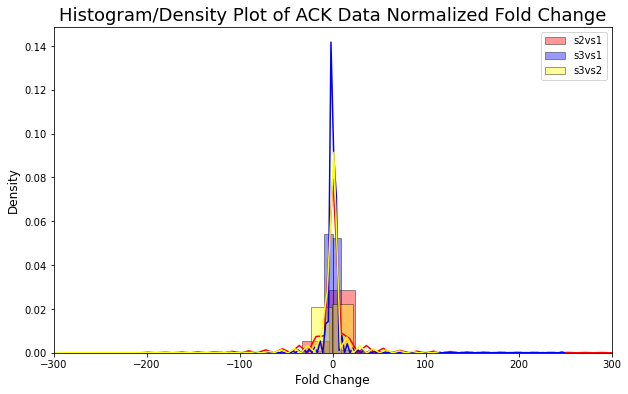

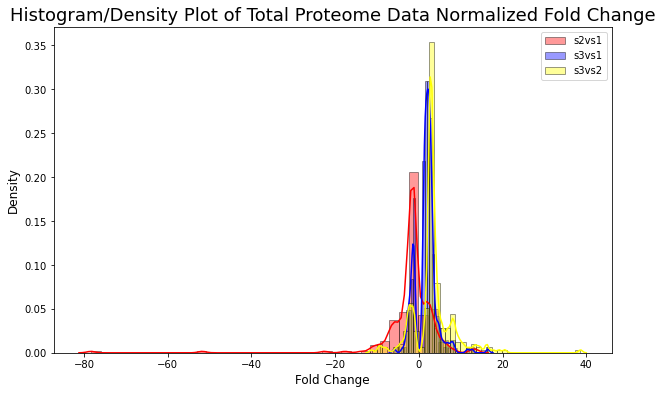

In [276]:
nfc_plot_data_ack = proteomics_ack.iloc[:, 2:5]
nfc_plot_data_ack = nfc_plot_data_ack.replace(to_replace="–", value=0)
nfc_plot_data_ack.replace(np.nan,0)

sns.distplot(nfc_plot_data_ack["nfc_s2vs1"], bins=40, label="s2vs1",color='red',hist_kws={"edgecolor": 'black'})
sns.distplot(nfc_plot_data_ack["nfc_s3vs1"], bins=40, label="s3vs1", color='blue', hist_kws={"edgecolor": 'black'})
sns.distplot(nfc_plot_data_ack["nfc_s3vs2"], bins=40, label="s3vs2", color='yellow', hist_kws={"edgecolor": 'black'});

plt.title("Histogram/Density Plot of ACK Data Normalized Fold Change", fontsize= 18)
plt.xlim(-300, 300)
plt.xlabel("Fold Change", fontsize=12)
plt.ylabel("Density", fontsize=12);
plt.legend();
plt.show();

nfc_plot_data_total = proteomics_total.iloc[:, 3:6]
nfc_plot_data_total = nfc_plot_data_total.replace(to_replace="–", value=0)
nfc_plot_data_total.replace(np.nan,0)

sns.distplot(nfc_plot_data_total["nfc_s2vs1"], bins=40, label="s2vs1", color='red',hist_kws={"edgecolor": 'black'})
sns.distplot(nfc_plot_data_total["nfc_s3vs1"], bins=40, label="s3vs1", color='blue', hist_kws={"edgecolor": 'black'})
sns.distplot(nfc_plot_data_total["nfc_s3vs2"], bins=40, label="s3vs2", color='yellow', hist_kws={"edgecolor": 'black'});

plt.title("Histogram/Density Plot of Total Proteome Data Normalized Fold Change", fontsize= 18)
plt.xlabel("Fold Change", fontsize=12)
plt.ylabel("Density", fontsize=12);
plt.legend();
plt.show();


## Parallel Coordinate Plots

In [277]:
col = proteomics_ack.pop("Index")
proteomics_ack.insert(1, col.name, col)
proteomics_ack

,Index in Detail,Index,nfc_s2vs1,nfc_s3vs1,nfc_s3vs2,Max Abundance,Max % CV,Gene Name,Protein Name,Site,...,Run 1 Sample 2 : Sample 1.4,Run 1 Sample 3 : Sample 1.4,Run 1 Sample 3 : Sample 2.4,Run 2 Sample 2 : Sample 1.4,Run 2 Sample 3 : Sample 1.4,Run 2 Sample 3 : Sample 2.4,Sample 2 : Sample 1.5,Sample 3 : Sample 1.5,Sample 3 : Sample 2.5,Species
1,35,2,23.655555,1.10431,-23.409127,2.456167e+07,0.643131,Fgb,FGB,304,...,21.671158,1.116027,-22.101689,NaN,NaN,NaN,23.655555,1.104311,-23.409127,mouse
2,36,3,3.631596,-2.0099,-7.976540,1.991868e+07,0.324883,Fgb,FGB,67,...,2.624790,-2.221023,-6.635375,5.327349,-1.699753,-8.880685,3.631596,-2.009896,-7.976540,mouse
3,37,4,3.144754,2.99733,-1.146557,2.710754e+06,0.622032,Lpp;Lpp,LPP;LPP iso4,541;416,...,2.880949,3.029128,-1.082520,NaN,NaN,NaN,3.144754,2.997329,-1.146557,mouse
4,48,5,8.843813,1.87013,-5.167873,5.383860e+06,0.675029,Rai14,RAI14,§935,...,7.548823,1.542501,-5.570210,3.531506,3.785443,1.092968,8.843813,1.870128,-5.167873,mouse
5,68,6,3.454298,4.7209,1.250609,3.814678e+07,0.232790,Ywhaz,14-3-3 zeta,"3, §9",...,4.411145,6.438681,1.282412,-5.112826,-1.335631,3.903240,3.454298,4.720901,1.250609,mouse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,5581,882,4.354904,-1.03223,-4.912453,2.844412e+07,0.135401,Zc3h18,ZC3H18,631,...,3.989584,-1.021394,-4.638084,NaN,NaN,NaN,4.354904,-1.032229,-4.912453,mouse
882,5582,883,14.425522,-3.8181,-60.189761,1.489134e+07,0.399518,Zc3h18,ZC3H18,647,...,4.236645,-8.729045,-42.092700,63.923446,1.546649,-40.533847,14.425522,-3.818102,-60.189761,mouse
883,5583,884,130.183213,3.09442,-45.974796,5.493834e+07,0.367272,Zc3h18,ZC3H18,947,...,249.861527,7.961670,-35.720141,62.536802,1.042196,-58.848527,130.183213,3.094416,-45.974796,mouse
884,5585,885,3.803267,-3.47581,-14.446278,1.222368e+07,0.190595,Zyg11b,ZYG11B,737,...,1.059653,-1.595159,-1.923913,3.950990,-3.796568,-14.711147,3.803267,-3.475807,-14.446278,mouse


In [278]:
print("No.of.unique values :" , len(pd.unique(proteomics_total["Protein Name"])))

print("Total number of values :", len(proteomics_total["Protein Name"]))
proteomics_total

No.of.unique values : 254
Total number of values : 254


,Index,Gene Name,Protein Name,nfc_s2vs1,nfc_s3vs1,nfc_s3vs2,pv_s2vs1,pv_s3vs1,pv_s3vs2,Accession,...,log2_s3vs2,norm_log2_s2vs1,norm_log2_s3vs1,norm_log2_s3vs2,nfc_s2vs1,norm_fc2_s3vs1,norm_fc2_s3vs2,pv2_s2vs1,pv2_s3vs1,pv2_s3vs2
0,1,Abat,ABAT,-6.743289,-2.169717,3.155556,0.002375,0.020316,0.019737,P61922,...,1.358550,-2.753452,-1.117507,1.657894,-6.743289,-2.169717,3.155556,0.002375,0.020316,0.019737
1,2,Abcd3,ABCD3,-2.748379,-1.410763,1.978015,0.000000,0.000000,0.000000,P55096,...,0.684709,-1.458581,-0.496476,0.984054,-2.748379,-1.410763,1.978015,0.000000,0.000000,0.000000
2,3,Acaa1b,ACAA1b,-9.654748,-3.975903,2.465541,0.026466,0.035343,0.051539,Q8VCH0,...,1.002560,-3.271239,-1.991283,1.301904,-9.654748,-3.975903,2.465541,0.026466,0.035343,0.051539
3,4,Acaa2,ACAA2,-1.366824,2.327208,3.229647,0.355260,0.012427,0.002127,Q8BWT1,...,1.392032,-0.450828,1.218600,1.691376,-1.366824,2.327208,3.229647,0.355260,0.012427,0.002127
4,5,Acadl,ACADL,1.103580,2.450321,2.254376,0.530450,0.022924,0.064977,P51174,...,0.873384,0.142191,1.292971,1.172728,1.103580,2.450321,2.254376,0.530450,0.022924,0.064977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,250,Uqcrh,UQCRHL,-1.428282,1.870396,2.712405,0.350168,0.097048,0.026312,P99028,...,1.140228,-0.514281,0.903343,1.439573,-1.428282,1.870396,2.712405,0.350168,0.097048,0.026312
250,251,Uqcrq,UQCRQ,-1.561158,1.846188,2.926375,0.489938,0.365756,0.173066,Q9CQ69,...,1.249770,-0.642617,0.884549,1.549115,-1.561158,1.846188,2.926375,0.489938,0.365756,0.173066
251,252,Uox,uricase,-7.383200,1.103705,8.273797,0.005593,0.975061,0.006159,P25688,...,2.749205,-2.884246,0.142355,3.048550,-7.383200,1.103705,8.273797,0.005593,0.975061,0.006159
252,253,Vtn,VTN,2.911142,-1.145080,-3.283159,0.000242,0.342034,0.000062,P29788,...,-2.014429,1.541585,-0.195448,-1.715085,2.911142,-1.145080,-3.283159,0.000242,0.342034,0.000062


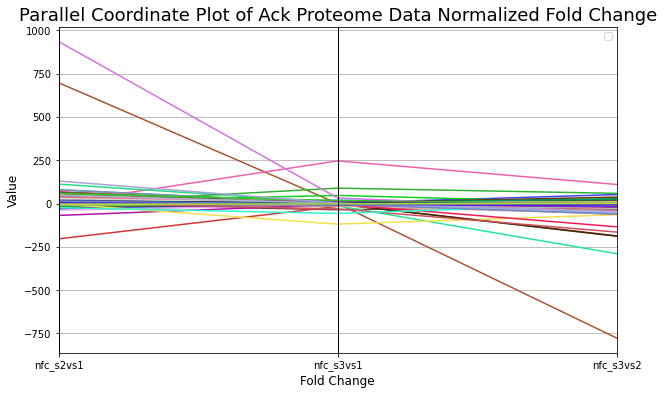

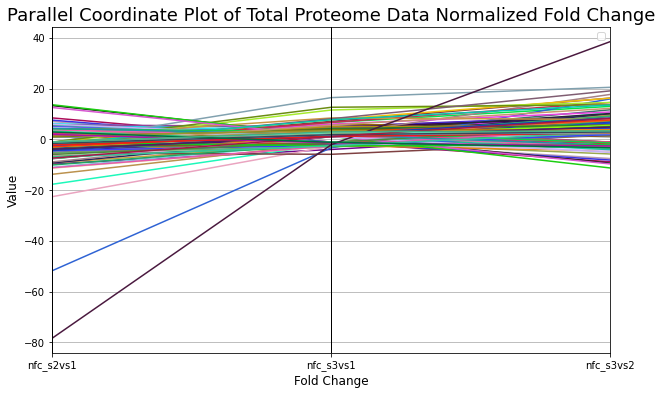

In [279]:
# Ack Proteome Data
nfc_plot_data_ack = proteomics_ack.iloc[:, 1:5]
nfc_plot_data_ack = nfc_plot_data_ack.replace(to_replace="–", value=0)
nfc_plot_data_ack.replace(np.nan,0)
nfc_plot_data_ack

pd.plotting.parallel_coordinates(nfc_plot_data_ack, "Index")
plt.title("Parallel Coordinate Plot of Ack Proteome Data Normalized Fold Change", fontsize= 18)
plt.xlabel("Fold Change", fontsize=12)
plt.ylabel("Value", fontsize=12);
plt.legend("");
plt.show();

# Total Proteome Data
nfc_plot_data_total = proteomics_total.iloc[:, 2:6]
nfc_plot_data_total = nfc_plot_data_total.replace(to_replace="–", value=0)
nfc_plot_data_total.replace(np.nan,0)

pd.plotting.parallel_coordinates(nfc_plot_data_total, "Protein Name")
plt.title("Parallel Coordinate Plot of Total Proteome Data Normalized Fold Change", fontsize= 18)
plt.xlabel("Fold Change", fontsize=12)
plt.ylabel("Value", fontsize=12);
plt.legend("");
plt.show();

## Ordinal Regression/Slope Plots

In [280]:

proteomics_ack['nfc_s3vs1'] = pd.to_numeric(proteomics_ack['nfc_s3vs1'],errors = 'coerce')
proteomics_ack = proteomics_ack.replace(np.nan,0)
proteomics_ack

,Index in Detail,Index,nfc_s2vs1,nfc_s3vs1,nfc_s3vs2,Max Abundance,Max % CV,Gene Name,Protein Name,Site,...,Run 1 Sample 2 : Sample 1.4,Run 1 Sample 3 : Sample 1.4,Run 1 Sample 3 : Sample 2.4,Run 2 Sample 2 : Sample 1.4,Run 2 Sample 3 : Sample 1.4,Run 2 Sample 3 : Sample 2.4,Sample 2 : Sample 1.5,Sample 3 : Sample 1.5,Sample 3 : Sample 2.5,Species
1,35,2,23.655555,1.104311,-23.409127,2.456167e+07,0.643131,Fgb,FGB,304,...,21.671158,1.116027,-22.101689,0.000000,0.000000,0.000000,23.655555,1.104311,-23.409127,mouse
2,36,3,3.631596,-2.009896,-7.976540,1.991868e+07,0.324883,Fgb,FGB,67,...,2.624790,-2.221023,-6.635375,5.327349,-1.699753,-8.880685,3.631596,-2.009896,-7.976540,mouse
3,37,4,3.144754,2.997329,-1.146557,2.710754e+06,0.622032,Lpp;Lpp,LPP;LPP iso4,541;416,...,2.880949,3.029128,-1.082520,0.000000,0.000000,0.000000,3.144754,2.997329,-1.146557,mouse
4,48,5,8.843813,1.870128,-5.167873,5.383860e+06,0.675029,Rai14,RAI14,§935,...,7.548823,1.542501,-5.570210,3.531506,3.785443,1.092968,8.843813,1.870128,-5.167873,mouse
5,68,6,3.454298,4.720901,1.250609,3.814678e+07,0.232790,Ywhaz,14-3-3 zeta,"3, §9",...,4.411145,6.438681,1.282412,-5.112826,-1.335631,3.903240,3.454298,4.720901,1.250609,mouse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,5581,882,4.354904,-1.032229,-4.912453,2.844412e+07,0.135401,Zc3h18,ZC3H18,631,...,3.989584,-1.021394,-4.638084,0.000000,0.000000,0.000000,4.354904,-1.032229,-4.912453,mouse
882,5582,883,14.425522,-3.818102,-60.189761,1.489134e+07,0.399518,Zc3h18,ZC3H18,647,...,4.236645,-8.729045,-42.092700,63.923446,1.546649,-40.533847,14.425522,-3.818102,-60.189761,mouse
883,5583,884,130.183213,3.094416,-45.974796,5.493834e+07,0.367272,Zc3h18,ZC3H18,947,...,249.861527,7.961670,-35.720141,62.536802,1.042196,-58.848527,130.183213,3.094416,-45.974796,mouse
884,5585,885,3.803267,-3.475807,-14.446278,1.222368e+07,0.190595,Zyg11b,ZYG11B,737,...,1.059653,-1.595159,-1.923913,3.950990,-3.796568,-14.711147,3.803267,-3.475807,-14.446278,mouse


### Calculating the difference between the column values

In [281]:
proteomics_ack['diff_s2vs1_s3vs1'] = proteomics_ack.apply(lambda x: x['nfc_s2vs1'] - x['nfc_s3vs1'], axis=1)
proteomics_ack['diff_s3vs1_s3vs2'] = proteomics_ack.apply(lambda x: x['nfc_s3vs1'] - x['nfc_s3vs2'], axis=1)
proteomics_ack['diff_s2vs1_s3vs2'] = proteomics_ack.apply(lambda x: x['nfc_s2vs1'] - x['nfc_s3vs2'], axis=1)
proteomics_ack.iloc[[147]]

,Index in Detail,Index,nfc_s2vs1,nfc_s3vs1,nfc_s3vs2,Max Abundance,Max % CV,Gene Name,Protein Name,Site,...,Run 2 Sample 2 : Sample 1.4,Run 2 Sample 3 : Sample 1.4,Run 2 Sample 3 : Sample 2.4,Sample 2 : Sample 1.5,Sample 3 : Sample 1.5,Sample 3 : Sample 2.5,Species,diff_s2vs1_s3vs1,diff_s3vs1_s3vs2,diff_s2vs1_s3vs2
161,1412,162,-3.472793,-3.541511,-1.114431,5.416011e+07,0.215184,Acadl,ACADL,§156,...,0.0,0.0,0.0,-3.472793,-3.541511,-1.114431,mouse,0.068717,-2.42708,-2.358362


In [282]:
# Total Proteome Data
nfc_plot_data_total = proteomics_total.iloc[:, 3:6]
# nfc_s2vs1  nfc_s3vs1  nfc_s3vs2
nfc_plot_data_total = nfc_plot_data_total.replace(to_replace="–", value=0)
nfc_plot_data_total['nfc_s2vs1'].replace(to_replace=0, value=nfc_plot_data_total['nfc_s2vs1'].mean())
nfc_plot_data_total['nfc_s2vs1'].replace(np.nan, nfc_plot_data_total['nfc_s2vs1'].mean())
nfc_plot_data_total['nfc_s3vs1'].replace(to_replace=0, value=nfc_plot_data_total['nfc_s3vs1'].mean())
nfc_plot_data_total['nfc_s3vs1'].replace(np.nan, nfc_plot_data_total['nfc_s3vs1'].mean())
nfc_plot_data_total['nfc_s3vs2'].replace(to_replace=0, value=nfc_plot_data_total['nfc_s3vs2'].mean())
nfc_plot_data_total['nfc_s3vs2'].replace(np.nan, nfc_plot_data_total['nfc_s3vs2'].mean())

print(nfc_plot_data_total.head(3))

# Ack Proteome Data
nfc_plot_data_ack = proteomics_ack.iloc[:, 2:5]
nfc_plot_data_ack = nfc_plot_data_ack.replace(to_replace="–", value=0)
nfc_plot_data_ack['nfc_s2vs1'].replace(to_replace=0, value=nfc_plot_data_ack['nfc_s2vs1'].mean())
nfc_plot_data_ack['nfc_s2vs1'].replace(np.nan, nfc_plot_data_ack['nfc_s2vs1'].mean())
nfc_plot_data_ack['nfc_s3vs1'].replace(to_replace=0, value=nfc_plot_data_ack['nfc_s3vs1'].mean())
nfc_plot_data_ack['nfc_s3vs1'].replace(np.nan, nfc_plot_data_ack['nfc_s3vs1'].mean())
nfc_plot_data_ack['nfc_s3vs2'].replace(to_replace=0, value=nfc_plot_data_ack['nfc_s3vs2'].mean())
nfc_plot_data_ack['nfc_s3vs2'].replace(np.nan, nfc_plot_data_ack['nfc_s3vs2'].mean())

print("\n",nfc_plot_data_ack.head(3))

   nfc_s2vs1  nfc_s3vs1  nfc_s3vs2
0  -6.743289  -2.169717   3.155556
1  -2.748379  -1.410763   1.978015
2  -9.654748  -3.975903   2.465541

    nfc_s2vs1  nfc_s3vs1  nfc_s3vs2
1  23.655555   1.104311 -23.409127
2   3.631596  -2.009896  -7.976540
3   3.144754   2.997329  -1.146557


proteomics_total.iloc[[208]]

### Using Linear and Ordinal Regression to calculate the slope of the rows

In [283]:
# https://stackoverflow.com/questions/69520967/how-to-get-the-slope-of-multiple-columns-in-python-data-frame
from sklearn.linear_model import LinearRegression
import mord

model = LinearRegression()
def get_coeff_linear(row, model=model):
    # fit a row assuming points are separated by unit length and return the slope.
    
    row = row.copy().dropna()
    model.fit(np.arange(len(row)).reshape(-1,1), row.values.reshape(-1,1))
    slope = model.coef_[0][0]
    return slope

# https://pythonhosted.org/mord/
m = mord.OrdinalRidge()
def get_coeff_ordinal(row, model=m):
    # fit a row assuming points are separated by unit length and return the slope.
    
    row = row.copy().dropna()
    model.fit(np.arange(len(row)).reshape(-1,1), row.values.reshape(-1,1))
    slope = model.coef_[0][0]
    return slope

In [284]:
ack_temp = pd.DataFrame()
total_temp = pd.DataFrame()

ack_temp["slope_linear"] = nfc_plot_data_ack.apply(get_coeff_linear, axis=1)
total_temp["slope_linear"] = nfc_plot_data_total.apply(get_coeff_linear, axis=1)

ack_temp["slope_ordinal"] = nfc_plot_data_ack.apply(get_coeff_ordinal, axis=1)
total_temp["slope_ordinal"] = nfc_plot_data_total.apply(get_coeff_ordinal, axis=1)

print("Ack Data : \n\n", ack_temp.head(3))
print("\nTotal Data : \n\n", total_temp.head(3))

nfc_plot_data_ack['slope_linear'] = ack_temp["slope_linear"]
nfc_plot_data_ack["slope_ordinal"] = ack_temp["slope_ordinal"]

nfc_plot_data_total['slope_linear'] = total_temp["slope_linear"]
nfc_plot_data_total['slope_ordinal'] = total_temp["slope_ordinal"]


Ack Data : 

    slope_linear  slope_ordinal
1    -23.532341     -15.688227
2     -5.804068      -3.869379
3     -2.145656      -1.430437

Total Data : 

    slope_linear  slope_ordinal
0      4.949423       3.299615
1      2.363197       1.575465
2      6.060145       4.040096


In [285]:

print("Ack Data : \n")
print("Smallest linear slopes : \n", nfc_plot_data_ack['slope_linear'].nsmallest(10), "\n")
print("Smallest ordinal slopes : \n",nfc_plot_data_ack['slope_ordinal'].nsmallest(10), "\n")

print("Largest linear slopes : \n", nfc_plot_data_ack['slope_linear'].nlargest(10), "\n")
print("Largest ordinal slopes : \n",nfc_plot_data_ack['slope_ordinal'].nlargest(10), "\n")

print("\nTotal Data : \n")
print("Smallest linear slopes : \n", nfc_plot_data_total['slope_linear'].nsmallest(10), "\n")
print("Smallest ordinal slopes : \n",nfc_plot_data_total['slope_ordinal'].nsmallest(10), "\n")

print("Largest linear slopes : \n", nfc_plot_data_total['slope_linear'].nlargest(10), "\n")
print("Largest ordinal slopes : \n",nfc_plot_data_total['slope_ordinal'].nlargest(10), "\n")

Ack Data : 

Smallest linear slopes : 
 147   -737.489978
665   -484.055411
247   -154.540940
60    -127.177818
666   -121.966951
883    -88.079005
770    -84.786767
781    -83.435686
88     -69.641962
714    -68.849341
Name: slope_linear, dtype: float64 

Smallest ordinal slopes : 
 147   -491.659985
665   -322.703607
247   -103.027293
60     -84.785212
666    -81.311300
883    -58.719336
770    -56.524511
781    -55.623790
88     -46.427975
714    -45.899561
Name: slope_ordinal, dtype: float64 

Largest linear slopes : 
 583    107.608133
218     54.200830
523     40.203297
216     35.296960
617     28.814087
543     23.373660
432     21.057506
155     21.025689
549     19.526710
359     19.018724
Name: slope_linear, dtype: float64 

Largest ordinal slopes : 
 583    71.738755
218    36.133887
523    26.802198
216    23.531306
617    19.209391
543    15.582440
432    14.038337
155    14.017126
549    13.017807
359    12.679149
Name: slope_ordinal, dtype: float64 


Total Data : 

Sma

In [286]:
print(nfc_plot_data_ack.head(5), "\n")
print(nfc_plot_data_total.head(5))

   nfc_s2vs1  nfc_s3vs1  nfc_s3vs2  slope_linear  slope_ordinal
1  23.655555   1.104311 -23.409127    -23.532341     -15.688227
2   3.631596  -2.009896  -7.976540     -5.804068      -3.869379
3   3.144754   2.997329  -1.146557     -2.145656      -1.430437
4   8.843813   1.870128  -5.167873     -7.005843      -4.670562
5   3.454298   4.720901   1.250609     -1.101845      -0.734563 

   nfc_s2vs1  nfc_s3vs1  nfc_s3vs2  slope_linear  slope_ordinal
0  -6.743289  -2.169717   3.155556      4.949423       3.299615
1  -2.748379  -1.410763   1.978015      2.363197       1.575465
2  -9.654748  -3.975903   2.465541      6.060145       4.040096
3  -1.366824   2.327208   3.229647      2.298235       1.532157
4   1.103580   2.450321   2.254376      0.575398       0.383599


In [287]:
proteomics_ack.insert(5, nfc_plot_data_ack['slope_linear'].name, nfc_plot_data_ack['slope_linear'])
proteomics_ack.insert(6, nfc_plot_data_ack['slope_ordinal'].name, nfc_plot_data_ack['slope_ordinal'])
proteomics_ack

,Index in Detail,Index,nfc_s2vs1,nfc_s3vs1,nfc_s3vs2,slope_linear,slope_ordinal,Max Abundance,Max % CV,Gene Name,...,Run 2 Sample 2 : Sample 1.4,Run 2 Sample 3 : Sample 1.4,Run 2 Sample 3 : Sample 2.4,Sample 2 : Sample 1.5,Sample 3 : Sample 1.5,Sample 3 : Sample 2.5,Species,diff_s2vs1_s3vs1,diff_s3vs1_s3vs2,diff_s2vs1_s3vs2
1,35,2,23.655555,1.104311,-23.409127,-23.532341,-15.688227,2.456167e+07,0.643131,Fgb,...,0.000000,0.000000,0.000000,23.655555,1.104311,-23.409127,mouse,22.551244,24.513438,47.064682
2,36,3,3.631596,-2.009896,-7.976540,-5.804068,-3.869379,1.991868e+07,0.324883,Fgb,...,5.327349,-1.699753,-8.880685,3.631596,-2.009896,-7.976540,mouse,5.641491,5.966644,11.608136
3,37,4,3.144754,2.997329,-1.146557,-2.145656,-1.430437,2.710754e+06,0.622032,Lpp;Lpp,...,0.000000,0.000000,0.000000,3.144754,2.997329,-1.146557,mouse,0.147424,4.143887,4.291311
4,48,5,8.843813,1.870128,-5.167873,-7.005843,-4.670562,5.383860e+06,0.675029,Rai14,...,3.531506,3.785443,1.092968,8.843813,1.870128,-5.167873,mouse,6.973685,7.038000,14.011685
5,68,6,3.454298,4.720901,1.250609,-1.101845,-0.734563,3.814678e+07,0.232790,Ywhaz,...,-5.112826,-1.335631,3.903240,3.454298,4.720901,1.250609,mouse,-1.266603,3.470292,2.203689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,5581,882,4.354904,-1.032229,-4.912453,-4.633679,-3.089119,2.844412e+07,0.135401,Zc3h18,...,0.000000,0.000000,0.000000,4.354904,-1.032229,-4.912453,mouse,5.387134,3.880224,9.267357
882,5582,883,14.425522,-3.818102,-60.189761,-37.307641,-24.871761,1.489134e+07,0.399518,Zc3h18,...,63.923446,1.546649,-40.533847,14.425522,-3.818102,-60.189761,mouse,18.243624,56.371658,74.615282
883,5583,884,130.183213,3.094416,-45.974796,-88.079005,-58.719336,5.493834e+07,0.367272,Zc3h18,...,62.536802,1.042196,-58.848527,130.183213,3.094416,-45.974796,mouse,127.088797,49.069212,176.158009
884,5585,885,3.803267,-3.475807,-14.446278,-9.124772,-6.083182,1.222368e+07,0.190595,Zyg11b,...,3.950990,-3.796568,-14.711147,3.803267,-3.475807,-14.446278,mouse,7.279074,10.970471,18.249545


In [288]:
proteomics_total.insert(6, nfc_plot_data_total['slope_linear'].name, nfc_plot_data_total['slope_linear'])
proteomics_total.insert(7, nfc_plot_data_total['slope_ordinal'].name, nfc_plot_data_total['slope_ordinal'])
proteomics_total

,Index,Gene Name,Protein Name,nfc_s2vs1,nfc_s3vs1,nfc_s3vs2,slope_linear,slope_ordinal,pv_s2vs1,pv_s3vs1,...,log2_s3vs2,norm_log2_s2vs1,norm_log2_s3vs1,norm_log2_s3vs2,nfc_s2vs1,norm_fc2_s3vs1,norm_fc2_s3vs2,pv2_s2vs1,pv2_s3vs1,pv2_s3vs2
0,1,Abat,ABAT,-6.743289,-2.169717,3.155556,4.949423,3.299615,0.002375,0.020316,...,1.358550,-2.753452,-1.117507,1.657894,-6.743289,-2.169717,3.155556,0.002375,0.020316,0.019737
1,2,Abcd3,ABCD3,-2.748379,-1.410763,1.978015,2.363197,1.575465,0.000000,0.000000,...,0.684709,-1.458581,-0.496476,0.984054,-2.748379,-1.410763,1.978015,0.000000,0.000000,0.000000
2,3,Acaa1b,ACAA1b,-9.654748,-3.975903,2.465541,6.060145,4.040096,0.026466,0.035343,...,1.002560,-3.271239,-1.991283,1.301904,-9.654748,-3.975903,2.465541,0.026466,0.035343,0.051539
3,4,Acaa2,ACAA2,-1.366824,2.327208,3.229647,2.298235,1.532157,0.355260,0.012427,...,1.392032,-0.450828,1.218600,1.691376,-1.366824,2.327208,3.229647,0.355260,0.012427,0.002127
4,5,Acadl,ACADL,1.103580,2.450321,2.254376,0.575398,0.383599,0.530450,0.022924,...,0.873384,0.142191,1.292971,1.172728,1.103580,2.450321,2.254376,0.530450,0.022924,0.064977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,250,Uqcrh,UQCRHL,-1.428282,1.870396,2.712405,2.070344,1.380229,0.350168,0.097048,...,1.140228,-0.514281,0.903343,1.439573,-1.428282,1.870396,2.712405,0.350168,0.097048,0.026312
250,251,Uqcrq,UQCRQ,-1.561158,1.846188,2.926375,2.243767,1.495844,0.489938,0.365756,...,1.249770,-0.642617,0.884549,1.549115,-1.561158,1.846188,2.926375,0.489938,0.365756,0.173066
251,252,Uox,uricase,-7.383200,1.103705,8.273797,7.828498,5.218999,0.005593,0.975061,...,2.749205,-2.884246,0.142355,3.048550,-7.383200,1.103705,8.273797,0.005593,0.975061,0.006159
252,253,Vtn,VTN,2.911142,-1.145080,-3.283159,-3.097150,-2.064767,0.000242,0.342034,...,-2.014429,1.541585,-0.195448,-1.715085,2.911142,-1.145080,-3.283159,0.000242,0.342034,0.000062


In [289]:
# Total Proteome Data
proteomics_total = proteomics_total.replace(to_replace="–", value=0)
proteomics_total['nfc_s2vs1'].replace(to_replace=0, value=proteomics_total['nfc_s2vs1'].mean())
proteomics_total['nfc_s2vs1'].replace(np.nan, proteomics_total['nfc_s2vs1'].mean())
proteomics_total['nfc_s3vs1'].replace(to_replace=0, value=proteomics_total['nfc_s3vs1'].mean())
proteomics_total['nfc_s3vs1'].replace(np.nan, proteomics_total['nfc_s3vs1'].mean())
proteomics_total['nfc_s3vs2'].replace(to_replace=0, value=proteomics_total['nfc_s3vs2'].mean())
proteomics_total['nfc_s3vs2'].replace(np.nan, proteomics_total['nfc_s3vs2'].mean())

print(proteomics_total.iloc[:, 0:7].head(3))

# Ack Proteome Data
proteomics_ack = proteomics_ack.replace(to_replace="–", value=0)
proteomics_ack['nfc_s2vs1'].replace(to_replace=0, value=proteomics_ack['nfc_s2vs1'].mean())
proteomics_ack['nfc_s2vs1'].replace(np.nan, proteomics_ack['nfc_s2vs1'].mean())
proteomics_ack['nfc_s3vs1'].replace(to_replace=0, value=proteomics_ack['nfc_s3vs1'].mean())
proteomics_ack['nfc_s3vs1'].replace(np.nan, proteomics_ack['nfc_s3vs1'].mean())
proteomics_ack['nfc_s3vs2'].replace(to_replace=0, value=proteomics_ack['nfc_s3vs2'].mean())
proteomics_ack['nfc_s3vs2'].replace(np.nan, proteomics_ack['nfc_s3vs2'].mean())

print("\n\n",proteomics_ack.iloc[:, 1:7].head(3))

   Index Gene Name Protein Name  nfc_s2vs1  nfc_s3vs1  nfc_s3vs2  slope_linear
0      1      Abat         ABAT  -6.743289  -2.169717   3.155556      4.949423
1      2     Abcd3        ABCD3  -2.748379  -1.410763   1.978015      2.363197
2      3    Acaa1b       ACAA1b  -9.654748  -3.975903   2.465541      6.060145


    Index  nfc_s2vs1  nfc_s3vs1  nfc_s3vs2  slope_linear  slope_ordinal
1      2  23.655555   1.104311 -23.409127    -23.532341     -15.688227
2      3   3.631596  -2.009896  -7.976540     -5.804068      -3.869379
3      4   3.144754   2.997329  -1.146557     -2.145656      -1.430437


### Clutered Heatmap of Fold Change values Code
ack_data = nfc_plot_data_ack.iloc[:,0:3]
total_data = nfc_plot_data_total.iloc[:,0:3]
nfc_s2vs1	nfc_s3vs1	nfc_s3vs2
ack_data['nfc_s2vs1'] = pd.to_numeric(ack_data['nfc_s2vs1'],errors = 'coerce')
ack_data['nfc_s3vs1'] = pd.to_numeric(ack_data['nfc_s2vs1'],errors = 'coerce')
ack_data['nfc_s3vs2'] = pd.to_numeric(ack_data['nfc_s2vs1'],errors = 'coerce')
ack_data.replace(np.nan,0)
ack_data.insert(0, proteomics_ack['Gene Name'].name, proteomics_ack['Gene Name'])
ack_data = ack_data.set_index('Gene Name')
ack_data
sns.clustermap(ack_data)
plt.show();

### Distribution of ordinal slopes

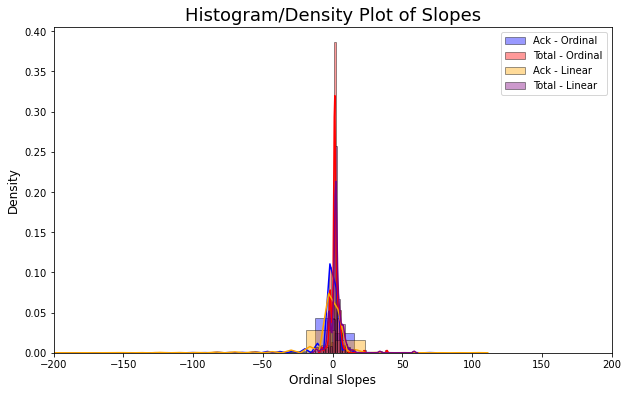

In [290]:
sns.distplot(proteomics_ack['slope_ordinal'], bins=40, label="Ack - Ordinal", color='blue',hist_kws={"edgecolor": 'black'});
sns.distplot(proteomics_total['slope_ordinal'], bins=40, label="Total - Ordinal", color='red',hist_kws={"edgecolor": 'black'});
sns.distplot(proteomics_ack['slope_linear'], bins=40, label="Ack - Linear", color='orange',hist_kws={"edgecolor": 'black'});
sns.distplot(proteomics_total['slope_linear'], bins=40, label="Total - Linear", color='purple',hist_kws={"edgecolor": 'black'});

plt.title("Histogram/Density Plot of Slopes", fontsize= 18)
plt.xlabel("Ordinal Slopes", fontsize=12)
plt.ylabel("Density", fontsize=12);
plt.xlim(-200,200)
plt.legend();
plt.show();

In [291]:
proteomics_ack.sort_values('slope_ordinal', ascending=True).head(10)

,Index in Detail,Index,nfc_s2vs1,nfc_s3vs1,nfc_s3vs2,slope_linear,slope_ordinal,Max Abundance,Max % CV,Gene Name,...,Run 2 Sample 2 : Sample 1.4,Run 2 Sample 3 : Sample 1.4,Run 2 Sample 3 : Sample 2.4,Sample 2 : Sample 1.5,Sample 3 : Sample 1.5,Sample 3 : Sample 2.5,Species,diff_s2vs1_s3vs1,diff_s3vs1_s3vs2,diff_s2vs1_s3vs2
147,1316,148,697.922537,0.000000,-777.057420,-737.489978,-491.659985,7.624733e+07,0.229042,Hmga1,...,486.495120,0.000000,-492.050810,697.922537,0.000000,-777.057420,mouse,697.922537,777.057420,1474.979956
665,4608,666,936.011258,31.865848,-32.099564,-484.055411,-322.703607,1.022583e+08,0.071178,Papola;Papola;Papola,...,164.338015,0.000000,-166.214727,936.011258,31.865848,-32.099564,mouse,904.145410,63.965412,968.110822
247,1986,248,19.509670,-13.581990,-289.572209,-154.540940,-103.027293,2.432998e+07,0.804028,Dus3l;Dus3l,...,41.254191,-2.887167,-116.812533,19.509670,-13.581990,-289.572209,mouse,33.091660,275.990219,309.081879
60,427,61,67.896527,-2.513000,-186.459109,-127.177818,-84.785212,7.417627e+06,0.265997,Brd1;Brd1,...,0.000000,0.000000,0.000000,67.896527,-2.513000,-186.459109,mouse,70.409527,183.946109,254.355636
666,4611,667,55.422516,-3.112489,-188.511385,-121.966951,-81.311300,4.727491e+07,0.554639,Rbm26;Rbm26;Rbm26;Rbm26;Rbm26,...,285.812628,0.000000,-289.076559,55.422516,-3.112489,-188.511385,mouse,58.535005,185.398896,243.933901
883,5583,884,130.183213,3.094416,-45.974796,-88.079005,-58.719336,5.493834e+07,0.367272,Zc3h18,...,62.536802,1.042196,-58.848527,130.183213,3.094416,-45.974796,mouse,127.088797,49.069212,176.158009
770,5069,771,4.915133,-30.655264,-164.658401,-84.786767,-56.524511,5.126373e+06,0.080313,Nr3c1;Nr3c1;Nr3c1;Nr3c1;Nr3c1,...,0.000000,0.000000,0.000000,4.915133,-30.655264,-164.658401,mouse,35.570398,134.003136,169.573534
781,5099,782,32.654887,-3.761094,-134.216484,-83.435686,-55.623790,5.511765e+07,0.300471,Smarcc2;Smarcc2,...,45.341425,-1.187143,-52.789510,32.654887,-3.761094,-134.216484,mouse,36.415981,130.455391,166.871371
88,594,89,79.630594,1.458777,-59.653330,-69.641962,-46.427975,5.853373e+06,0.727272,Mybbp1a,...,48.993430,1.441150,-33.340965,79.630594,1.458777,-59.653330,mouse,78.171818,61.112107,139.283924
714,4798,715,80.147096,1.521858,-57.551585,-68.849341,-45.899561,8.755989e+06,0.308583,Arid1b,...,0.000000,0.000000,0.000000,80.147096,1.521858,-57.551585,mouse,78.625239,59.073443,137.698682


In [292]:
proteomics_ack.sort_values('slope_ordinal', ascending=False).head(10)

,Index in Detail,Index,nfc_s2vs1,nfc_s3vs1,nfc_s3vs2,slope_linear,slope_ordinal,Max Abundance,Max % CV,Gene Name,...,Run 2 Sample 2 : Sample 1.4,Run 2 Sample 3 : Sample 1.4,Run 2 Sample 3 : Sample 2.4,Sample 2 : Sample 1.5,Sample 3 : Sample 1.5,Sample 3 : Sample 2.5,Species,diff_s2vs1_s3vs1,diff_s3vs1_s3vs2,diff_s2vs1_s3vs2
583,4082,584,-203.715534,-16.208959,11.500732,107.608133,71.738755,5.789345e+06,0.114311,Tpm1;Tpm1,...,-48.057044,-47.619392,0.000000,-203.715534,-16.208959,11.500732,mouse,-187.506575,-27.709691,-215.216266
218,1791,219,2.042439,246.510339,110.444099,54.200830,36.133887,2.511525e+07,0.332258,Ckmt2;Ckmt1,...,0.000000,0.000000,0.000000,2.042439,246.510339,110.444099,mouse,-244.467900,136.066240,-108.401660
523,3934,524,-68.627866,-5.331613,11.778727,40.203297,26.802198,7.774622e+07,0.343268,Myh3,...,-91.934119,-7.203834,13.012585,-68.627866,-5.331613,11.778727,mouse,-63.296253,-17.110340,-80.406593
216,1787,217,-18.655957,3.042362,51.937962,35.296960,23.531306,1.542275e+08,0.205517,Ckmt2,...,-41.243204,3.280152,137.942119,-18.655957,3.042362,51.937962,mouse,-21.698319,-48.895600,-70.593919
617,4301,618,1.382545,89.156659,59.010719,28.814087,19.209391,9.083561e+06,0.084443,Ttn;Ttn,...,1.103655,14.148664,13.071714,1.382545,89.156659,59.010719,mouse,-87.774114,30.145940,-57.628174
543,3985,544,-9.616161,4.219688,37.131159,23.373660,15.582440,1.641017e+07,0.215220,Myh6;Myh7,...,0.000000,0.000000,0.000000,-9.616161,4.219688,37.131159,mouse,-13.835849,-32.911472,-46.747321
432,3241,433,-37.321108,-7.123964,4.793903,21.057506,14.038337,1.023823e+08,0.566469,Atp5me,...,0.000000,0.000000,0.000000,-37.321108,-7.123964,4.793903,mouse,-30.197144,-11.917867,-42.115011
155,1346,156,-32.317724,-3.038235,9.733654,21.025689,14.017126,2.831308e+08,0.166929,Ttf1,...,-33.396677,-8.636268,3.943009,-32.317724,-3.038235,9.733654,mouse,-29.279490,-12.771889,-42.051378
549,3996,550,-15.129610,1.728010,23.923810,19.526710,13.017807,2.109946e+07,0.623697,Myh6;Myh7,...,0.000000,0.000000,0.000000,-15.129610,1.728010,23.923810,mouse,-16.857620,-22.195800,-39.053420
359,2752,360,-33.623690,-6.970972,4.413758,19.018724,12.679149,1.622613e+07,0.339026,Ndufs4,...,-39.681089,-87.791181,-2.169785,-33.623690,-6.970972,4.413758,mouse,-26.652718,-11.384730,-38.037448


In [293]:
proteomics_total.sort_values('slope_ordinal', ascending=True).head(10)

,Index,Gene Name,Protein Name,nfc_s2vs1,nfc_s3vs1,nfc_s3vs2,slope_linear,slope_ordinal,pv_s2vs1,pv_s3vs1,...,log2_s3vs2,norm_log2_s2vs1,norm_log2_s3vs1,norm_log2_s3vs2,nfc_s2vs1,norm_fc2_s3vs1,norm_fc2_s3vs2,pv2_s2vs1,pv2_s3vs1,pv2_s3vs2
208,209,S100a8,S100A8,13.653039,1.192023,-11.280739,-12.466889,-8.311259,1.582765e-03,0.368491,...,-3.795135,3.771150,0.253412,-3.495790,13.653039,1.192023,-11.280739,1.582765e-03,0.368491,1.600344e-03
126,127,Itga2b,ITGA2B,13.320794,1.397838,-9.385686,-11.353240,-7.568826,3.315332e-02,0.754550,...,-3.529807,3.735608,0.483198,-3.230462,13.320794,1.397838,-9.385686,3.315332e-02,0.754550,3.594649e-02
209,210,S100a9,S100A9,12.557913,1.276075,-9.692461,-11.125187,-7.416791,7.950183e-02,0.205812,...,-3.576208,3.650525,0.351713,-3.276863,12.557913,1.276075,-9.692461,7.950183e-02,0.205812,1.479478e-01
51,52,Clca2,CLCA5,8.459291,-1.061558,-8.844448,-8.651870,-5.767913,1.100392e-02,0.382579,...,-3.444117,3.080537,-0.086184,-3.144772,8.459291,-1.061558,-8.844448,1.100392e-02,0.382579,1.059857e-02
95,96,Fgg,FGG,7.569837,-1.092666,-8.146418,-7.858128,-5.238752,4.821582e-13,0.174904,...,-3.325511,2.920262,-0.127852,-3.026166,7.569837,-1.092666,-8.146418,4.821582e-13,0.174904,1.749254e-13
94,95,Fgb,FGB,7.051093,-1.087155,-7.549892,-7.300493,-4.866995,2.720650e-16,0.133999,...,-3.215801,2.817847,-0.120558,-2.916456,7.051093,-1.087155,-7.549892,2.720650e-16,0.133999,5.624568e-17
93,94,Fga,FGA,5.554245,-1.052914,-5.759847,-5.657046,-3.771364,1.334176e-15,0.269036,...,-2.825375,2.473591,-0.074388,-2.526030,5.554245,-1.052914,-5.759847,1.334176e-15,0.269036,2.356779e-16
211,212,Sdf2l1,SDF2L1,5.984040,1.144649,-5.148907,-5.566474,-3.710982,0.000000e+00,0.000000,...,-2.663611,2.581120,0.194905,-2.364266,5.984040,1.144649,-5.148907,0.000000e+00,0.000000,0.000000e+00
201,202,F2,prothrombin,5.779572,1.403806,-4.054912,-4.917242,-3.278161,0.000000e+00,0.000000,...,-2.319015,2.530963,0.489344,-2.019670,5.779572,1.403806,-4.054912,0.000000e+00,0.000000,0.000000e+00
114,115,Hba,HBA1,6.243494,2.703304,-2.274708,-4.259101,-2.839401,3.351848e-08,0.000006,...,-1.485026,2.642354,1.434724,-1.185682,6.243494,2.703304,-2.274708,3.351848e-08,0.000006,1.290402e-05


In [294]:
proteomics_total.sort_values('slope_ordinal', ascending=False).head(10)

,Index,Gene Name,Protein Name,nfc_s2vs1,nfc_s3vs1,nfc_s3vs2,slope_linear,slope_ordinal,pv_s2vs1,pv_s3vs1,...,log2_s3vs2,norm_log2_s2vs1,norm_log2_s3vs1,norm_log2_s3vs2,nfc_s2vs1,norm_fc2_s3vs1,norm_fc2_s3vs2,pv2_s2vs1,pv2_s3vs1,pv2_s3vs2
244,245,Ugt2b17,UGT2B15,-78.353374,-2.062314,38.575361,58.464367,38.976245,0.000000,0.005401,...,4.970263,-6.291923,-1.044264,5.269608,-78.353374,-2.062314,38.575361,0.000000,0.005401,0.000000
71,72,Cyp2d10,CYP2D10,-51.764953,-3.291340,15.968727,33.866840,22.577893,0.000000,0.064731,...,3.697833,-5.693904,-1.718675,3.997177,-51.764953,-3.291340,15.968727,0.000000,0.064731,0.000000
77,78,Dhtkd1,DHTKD1,-22.579580,-2.649835,8.651754,15.615667,10.410445,0.000000,0.000000,...,2.813648,-4.496947,-1.405903,3.112993,-22.579580,-2.649835,8.651754,0.000000,0.000000,0.000000
47,48,Ces3a,CES3,-17.696090,-1.679340,10.699063,14.197576,9.465051,0.000000,0.420158,...,3.120068,-4.145359,-0.747895,3.419412,-17.696090,-1.679340,10.699063,0.000000,0.420158,0.000000
88,89,Fabp1,FABP1,-8.853314,1.972482,17.730711,13.292012,8.861341,0.104543,0.423917,...,3.848834,-3.146218,0.980012,4.148178,-8.853314,1.972482,17.730711,0.104543,0.423917,0.096815
98,99,Ftcd,FTCD,-13.761890,-1.454648,9.605663,11.683777,7.789184,0.086347,0.386970,...,2.964540,-3.782607,-0.540670,3.263885,-13.761890,-1.454648,9.605663,0.086347,0.386970,0.268195
154,155,Myl4,MYL4,-1.227826,16.473990,20.537278,10.882552,7.255035,0.855102,0.023781,...,4.060828,-0.296106,4.042118,4.360173,-1.227826,16.473990,20.537278,0.855102,0.023781,0.022658
207,208,Ryr2,RYR2,-2.314607,8.140688,19.131345,10.722976,7.148651,0.000000,0.008162,...,3.958522,-1.210767,3.025151,4.257866,-2.314607,8.140688,19.131345,0.000000,0.008162,0.000000
14,15,Aldh8a1,ALDH8A1,-10.985871,-1.341131,8.317070,9.651470,6.434313,0.038783,0.279874,...,2.756731,-3.457577,-0.423450,3.056075,-10.985871,-1.341131,8.317070,0.038783,0.279874,0.007574
33,34,Bdh1,BDH,-7.606046,1.512585,11.681156,9.643601,6.429067,0.000611,0.008707,...,3.246766,-2.927147,0.597016,3.546111,-7.606046,1.512585,11.681156,0.000611,0.008707,0.001074


### Overllap Of Proteins in Total and Ack

In [295]:
proteomics_ack['First Gene Name'] = proteomics_ack['Gene Name'].str.split(';').str[0]
proteomics_ack['First Protein Name'] = proteomics_ack['Protein Name'].str.split(';').str[0]
proteomics_ack.head(3)

,Index in Detail,Index,nfc_s2vs1,nfc_s3vs1,nfc_s3vs2,slope_linear,slope_ordinal,Max Abundance,Max % CV,Gene Name,...,Run 2 Sample 3 : Sample 2.4,Sample 2 : Sample 1.5,Sample 3 : Sample 1.5,Sample 3 : Sample 2.5,Species,diff_s2vs1_s3vs1,diff_s3vs1_s3vs2,diff_s2vs1_s3vs2,First Gene Name,First Protein Name
1,35,2,23.655555,1.104311,-23.409127,-23.532341,-15.688227,2.456167e+07,0.643131,Fgb,...,0.000000,23.655555,1.104311,-23.409127,mouse,22.551244,24.513438,47.064682,Fgb,FGB
2,36,3,3.631596,-2.009896,-7.976540,-5.804068,-3.869379,1.991868e+07,0.324883,Fgb,...,-8.880685,3.631596,-2.009896,-7.976540,mouse,5.641491,5.966644,11.608136,Fgb,FGB
3,37,4,3.144754,2.997329,-1.146557,-2.145656,-1.430437,2.710754e+06,0.622032,Lpp;Lpp,...,0.000000,3.144754,2.997329,-1.146557,mouse,0.147424,4.143887,4.291311,Lpp,LPP


In [296]:
# total = proteomics_total['Protein Name'].copy().astype("string").str.upper()
# ack = proteomics_ack['First Protein Name'].copy().astype("string").str.upper()

# # adding labels using set_labels parameter
# venn2([ack, total], set_labels = ('Ack Proteome Proteins', 'Total Proteome Proteins'))

# # plot title
# plt.title('Relationship b/w the Ack and Total Proteome Proteins\n')

# print(ack.tolist())

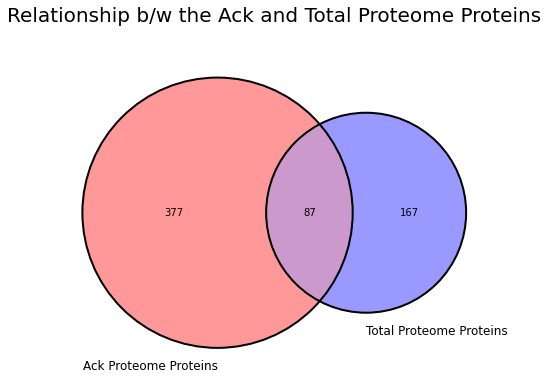

In [297]:
plt.figure(facecolor="white", figsize = (10,6))

# make the venn diagram
v = venn2([set(proteomics_ack['First Protein Name']), set(proteomics_total['Protein Name'])],
set_labels=['Ack Proteome Proteins', 'Total Proteome Proteins'])

v.get_patch_by_id('10').set_color('red')
v.get_patch_by_id('10').set_alpha(0.4)
v.get_patch_by_id('01').set_color('blue')
v.get_patch_by_id('01').set_alpha(0.4)
v.get_patch_by_id('11').set_color('purple')
v.get_patch_by_id('11').set_alpha(0.4)

# add circle outlines
c = venn2_circles([set(proteomics_ack['First Protein Name']), set(proteomics_total['Protein Name'])],
                  linestyle='solid')
plt.title('Relationship b/w the Ack and Total Proteome Proteins\n', fontsize=20)
plt.show()

Making Data set of the common proteins between the total and ack data sets.

In [298]:
total = proteomics_total['Protein Name'].copy().tolist()
ack = proteomics_ack['First Protein Name'].copy().tolist()

common_proteins = proteomics_ack[proteomics_ack['First Protein Name'].isin(total)]
common_proteins = common_proteins['First Protein Name'].copy().drop_duplicates() # .tolist()

common_proteins


1         FGB
25        CLU
32       GBAS
59      APOA1
159     ACAA2
        ...  
701       FGG
723     CSRP3
794    EEF1A2
831      SDHA
864     IGHG3
Name: First Protein Name, Length: 87, dtype: object

### Making Scatter plot of the ordinal slopes for the targetted ack set and the total set.

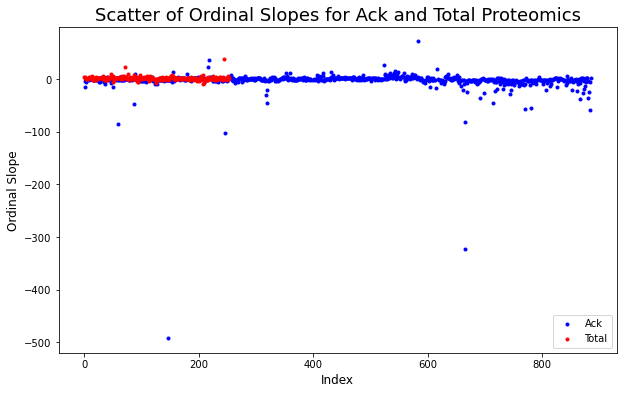

In [299]:
ack_prot = proteomics_ack.copy()
total_prot = proteomics_total.copy()

fig = plt.figure()
ax1 = fig.add_subplot(111)

ack_prot = ack_prot.reset_index()
total_prot = total_prot.reset_index()

ax1.scatter(ack_prot['index'], ack_prot['slope_ordinal'], c='b', marker=".", label='Ack')
ax1.scatter(total_prot['index'], total_prot['slope_ordinal'], c='r', marker=".", label='Total')

plt.legend(loc='lower right');
plt.title('Scatter of Ordinal Slopes for Ack and Total Proteomics', fontsize=18)
plt.xlabel('Index', fontsize=12);
plt.ylabel('Ordinal Slope', fontsize=12);
plt.show();


### To Do Next: 
- Normalized values for regression *
- permutation test with batch correction
- overlap of proteins between ack and total *
- scatter of targetted vs total *
- map slopes back to proteins *
- ~~h clust of fold change - heatmap~~
- distribution of slopes * 
- gene / protein enrichment

# Permutation Tests - Ack

> ##### **Current Task**: take the normalized abundance values instead of the fold change ratios and use those to calculate the slopes, And then per peptide/row, the permutation test would be testing how likely / unlikely it would be to obtain that slope if you permuted the values used to calculate each slope

In [300]:
proteomics_ack.head(4)

,Index in Detail,Index,nfc_s2vs1,nfc_s3vs1,nfc_s3vs2,slope_linear,slope_ordinal,Max Abundance,Max % CV,Gene Name,...,Run 2 Sample 3 : Sample 2.4,Sample 2 : Sample 1.5,Sample 3 : Sample 1.5,Sample 3 : Sample 2.5,Species,diff_s2vs1_s3vs1,diff_s3vs1_s3vs2,diff_s2vs1_s3vs2,First Gene Name,First Protein Name
1,35,2,23.655555,1.104311,-23.409127,-23.532341,-15.688227,2.456167e+07,0.643131,Fgb,...,0.000000,23.655555,1.104311,-23.409127,mouse,22.551244,24.513438,47.064682,Fgb,FGB
2,36,3,3.631596,-2.009896,-7.976540,-5.804068,-3.869379,1.991868e+07,0.324883,Fgb,...,-8.880685,3.631596,-2.009896,-7.976540,mouse,5.641491,5.966644,11.608136,Fgb,FGB
3,37,4,3.144754,2.997329,-1.146557,-2.145656,-1.430437,2.710754e+06,0.622032,Lpp;Lpp,...,0.000000,3.144754,2.997329,-1.146557,mouse,0.147424,4.143887,4.291311,Lpp,LPP
4,48,5,8.843813,1.870128,-5.167873,-7.005843,-4.670562,5.383860e+06,0.675029,Rai14,...,1.092968,8.843813,1.870128,-5.167873,mouse,6.973685,7.038000,14.011685,Rai14,RAI14


1. nfc_s2vs1 vs nfc_s3vs1
2. nfc_s3vs1 vs nfc_s3vs2
3. nfc_s2vs1 vs nfc_s3vs2

X = proteomics_ack['nfc_s2vs1'].copy()
y = 'nfc_s2vs1'

clf = SVC(kernel="linear", random_state=7)
cv = StratifiedKFold(2, shuffle=True, random_state=0)

score_iris, perm_scores_iris, pvalue_iris = permutation_test_score(
    clf, X, y, scoring="accuracy", cv=cv, n_permutations=1000
)


In [339]:
import matplotlib.pyplot as plt
from itertools import combinations

def all_possible_divisions(all: np.ndarray, len_A: int):
    '''Get list of all possible divisions of list of elements into two groups'''
    indices = set(range(len(all)))
    divisions = []
    for A_ids in combinations(indices, len_A):
        B_ids = indices - set(A_ids)
        A = []
        B = []
        for i in range(len(all)):
            if i in A_ids: 
                A.append(all[i])
            elif i in B_ids:
                B.append(all[i])
            else:
                raise IndexError
        
        divisions.append((A, B))
        # print(len(divisions))
    return divisions

def permutation_test(A: np.ndarray, B: np.ndarray): # [![enter image description here][1]][1]
    d = np.mean(B) - np.mean(A)
    print('Observed difference: ', d)
    
    # get all possible partitions into A and B
    all = A + B
    print(all)
    ds = [np.mean(Bp) - np.mean(Ap) for (Ap, Bp) in all_possible_divisions(all, len(A))]


    plt.hist(ds, bins = 30)
    plt.axvline(x = d, color = 'red')
    plt.title('Distribution of differences between A and B sets of all possible label assignments')
    plt.show()

    # probability of obtaining greater than d:
    decreasing = list(sorted(ds, reverse = True))
    print(f'Sorted differences:\n{decreasing}\n')
    greater_than_d = 0
    for i in range(len(all)):
        if decreasing[i] > d:
            greater_than_d += 1
        else: 
            break
    print(f'Probability of obtaining difference greater than d: {greater_than_d/len(ds)}')

Observed difference:  1.5
[30, 29, 30, 29, 32, 31, 31, 30]


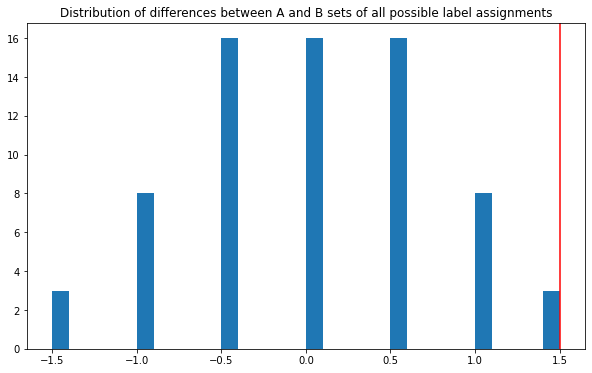

Sorted differences:
[1.5, 1.5, 1.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.5, -1.5, -1.5]

Probability of obtaining difference greater than d: 0.0


In [340]:
# test data
A = [30, 29, 30, 29]
B = [32, 31, 31, 30]

# A = proteomics_ack['nfc_s2vs1'].tolist()
# B = proteomics_ack['nfc_s3vs1'].tolist()

permutation_test(A, B)

#### Second Attempt at Permutation

def permute(nums):
  result_perms = [[]]
  for n in nums:
    new_perms = []
    for perm in result_perms:
      for i in range(len(perm)+1):
        new_perms.append(perm[:i] + [n] + perm[i:])
        result_perms = new_perms
  return result_perms

Create an empty list
Row_list =[]

Iterate over each row
for rows in proteomics_ack.iloc[:, 2:5].itertuples():
    Create list for the current row
    my_list =[rows.nfc_s2vs1, rows.nfc_s3vs1, rows.nfc_s3vs2]
      
    append the list to the final list
    Row_list.append(my_list)
  
Print the list
print(Row_list)